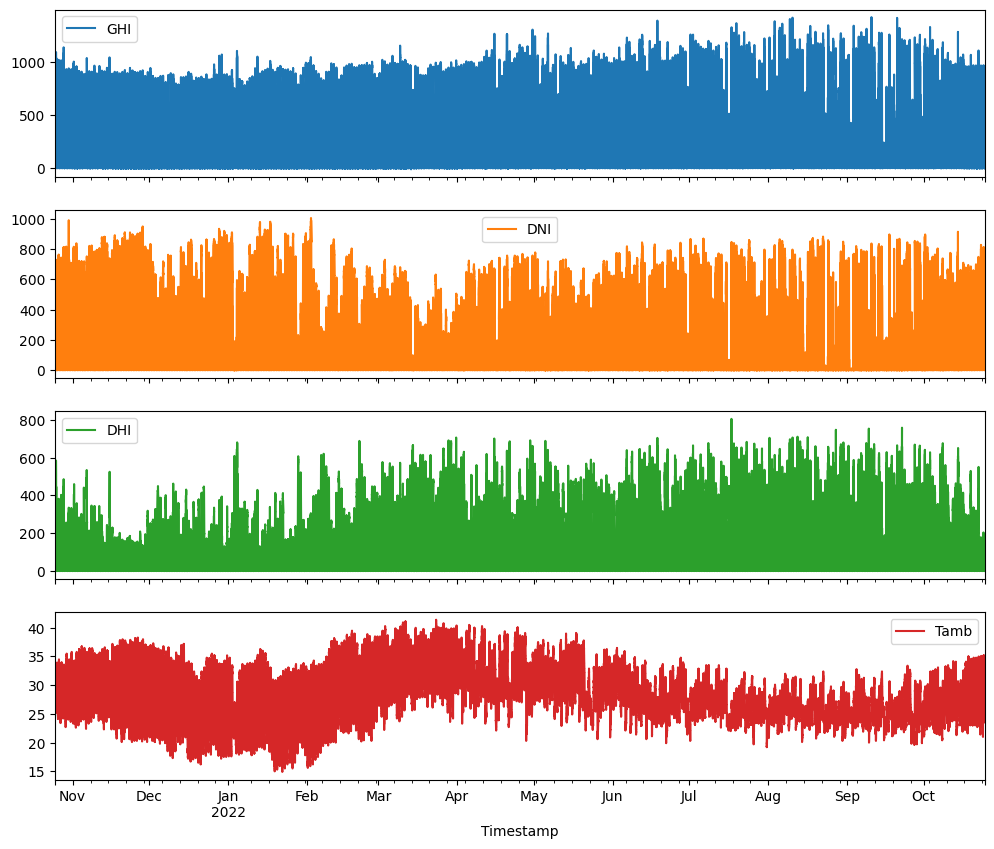

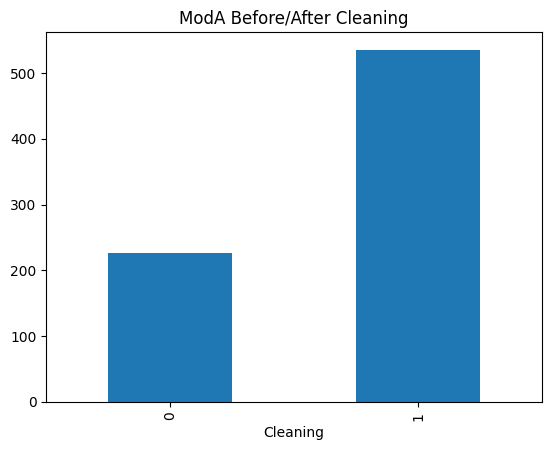

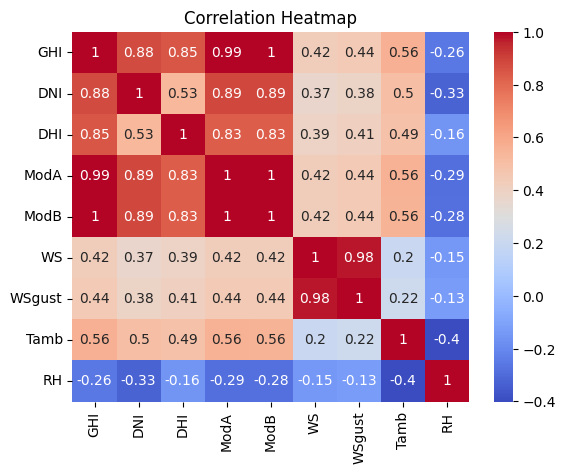

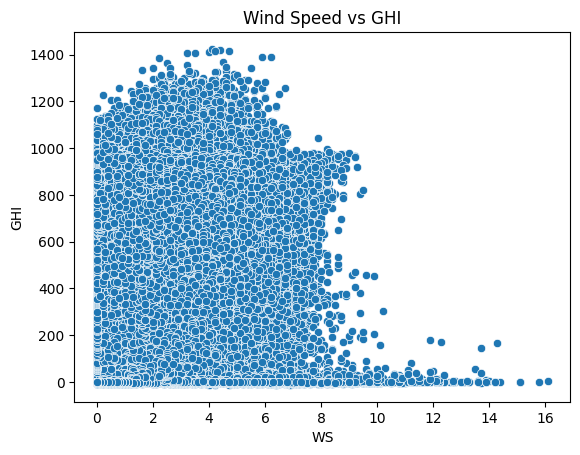

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


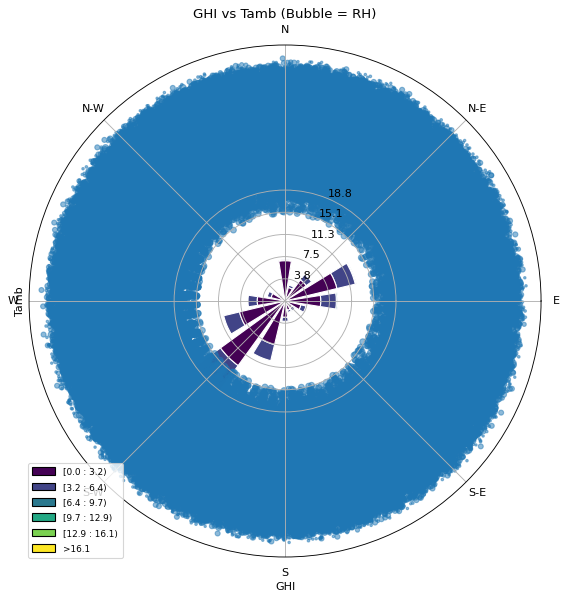

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the data
df = pd.read_csv('data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

df.head()

df.describe()

# Missing values
missing = df.isna().sum()
missing[missing > 0]

missing_percent = (df.isna().sum() / len(df)) * 100
missing_percent[missing_percent > 5]


cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df['outlier'] = df[cols].apply(lambda x: np.abs(zscore(x, nan_policy='omit')) > 3, axis=0).any(axis=1)
df['outlier'].value_counts()

# Fill missing with median
for col in cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

# Save cleaned data
df_clean = df.drop(columns=['outlier'])
df_clean.to_csv('data/togo-dapaong_qc_clean.csv', index=False)

df.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 10))
plt.show()


df.groupby('Cleaning')['ModA'].mean().plot(kind='bar', title="ModA Before/After Cleaning")
plt.show()


sns.heatmap(df[cols + ['Tamb', 'RH']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("Wind Speed vs GHI")
plt.show()


# Optional: Use windrose library if installed
%pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb (Bubble = RH)')
plt.show()


